# Calculate Standardized Anomalies

In [1]:
import xarray as xr
import numpy as np
import glob
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import pickle

### 500 hPa Geopotential Heights

In [2]:
#check all files are there. (8 filers per member, with 5 members should equal 40)
len(glob.glob("/Users/zkq5md/Desktop/UVA/Data/*.Z500.*.nc"))

40

In [3]:
#subset data based on extended winter
ds = xr.open_dataset('/Users/zkq5md/Desktop/UVA/Data/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h1.Z500.19400101-19491231.nc')
ds_ex_win = ds.sel(time=ds.time.dt.month.isin([1, 2, 3, 11, 12]))
ds_ex_win

<xarray.Dataset>
Dimensions:       (lat: 192, lon: 288, lev: 32, ilev: 33, time: 1510, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 1940-01-01 00:00:00 ... 1949-12-31 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/26)
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    ...            ...
    n2ovmr        (time) float64 ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) float64 ...
    Z500          (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BHISTcmip6.f09_g17.LE2-1001.001
    logname:           sunseon
    host:              mom2
    initial_file:      b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.i.1001-01-...
    topography_file:   /mnt/lustre/share/CESM/cesm_input/atm/cam/topo/fv_0.9x...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  day_1

In [4]:
time1= datetime.datetime.now()
path = '/Users/zkq5md/Desktop/UVA/Data/Training/Z500'

#iterate through the members
for member in range(5):

    #load the current member
    ds = xr.open_mfdataset(f'/Users/zkq5md/Desktop/UVA/Data/*00{member+1}*.Z500.*.nc')
    
    #subset data based on extended winter
    ds_ex_win = ds.sel(time=ds.time.dt.month.isin([1, 2, 3, 11, 12]))

    #for loop that calculates standard deviation and average for each member grid point.
    for day in np.unique(ds_ex_win.time.dt.dayofyear.values):
        
        #calculate average and standard deviation for each grid point (on axis 0).
        avg = np.average(ds_ex_win.sel(time=ds_ex_win.time.dt.dayofyear.isin([day])).Z500.values, axis=0)
        std = np.std(ds_ex_win.sel(time=ds_ex_win.time.dt.dayofyear.isin([day])).Z500.values, axis=0)
    
        #calculate standardized anomaly for the day of year for the member.
        std_anom = (ds_ex_win.sel(time=ds_ex_win.time.dt.dayofyear.isin([day])).Z500.values - avg)/std

        for num, did in enumerate(ds_ex_win.sel(time=ds_ex_win.time.dt.dayofyear.isin([day])).time.values):
            pickle.dump(std_anom[num,:,:],open(f'{path}/Z500_{did.year}_{str(did.month).zfill(2)}_'
                                               f'{str(did.day).zfill(2)}_mem{member+1}.pkl', 'wb'))

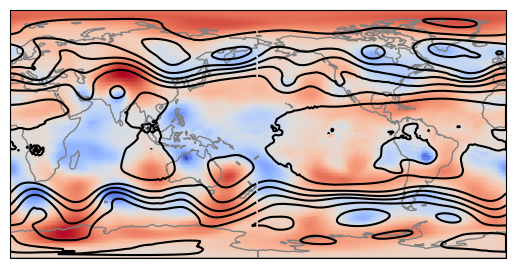

In [5]:
projection = ccrs.PlateCarree(central_longitude=180)
transform = ccrs.PlateCarree()

#plot the 500 hPa heights and anomalies
ax = plt.subplot(1, 1, 1, projection=projection)
ax.pcolormesh(ds_ex_win.lon.values, ds_ex_win.lat.values, std_anom[0,:,:], cmap='coolwarm')
ax.contour(ds_ex_win.lon.values, ds_ex_win.lat.values, ds_ex_win.Z500.values[0,:,:],colors='k')
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='grey', facecolor='none')

### 2m Temperatures

In [6]:
#check all files are there. (8 filers per member, with 5 members should equal 40)
len(glob.glob("/Users/zkq5md/Desktop/UVA/Data/*.TREFHT.*.nc"))

40

In [7]:
path = '/Users/zkq5md/Desktop/UVA/Data/Training/Temps'

#iterate through the members
for member in range(5):

    #load the current member
    ds = xr.open_mfdataset(f'/Users/zkq5md/Desktop/UVA/Data/*00{member+1}*.TREFHT.*.nc')
    
    #subset data based on extended winter
    ds_ex_win = ds.sel(time=ds.time.dt.month.isin([1, 2, 3, 11, 12]))

    #for loop that calculates standard deviation and average for each member grid point.
    for day in np.unique(ds_ex_win.time.dt.dayofyear.values):
        #calculate average and standard deviation.
        avg = np.average(ds_ex_win.sel(time=ds_ex_win.time.dt.dayofyear.isin([day])).TREFHT.values, axis=0)
        std = np.std(ds_ex_win.sel(time=ds_ex_win.time.dt.dayofyear.isin([day])).TREFHT.values, axis=0)
    
        #calculate standardized anomaly for the day of year for the member.
        std_anom = (ds_ex_win.sel(time=ds_ex_win.time.dt.dayofyear.isin([day])).TREFHT.values - avg)/std

        for num, did in enumerate(ds_ex_win.sel(time=ds_ex_win.time.dt.dayofyear.isin([day])).time.values):
            pickle.dump(std_anom[num,:,:],open(f'{path}/temps_{did.year}_{str(did.month).zfill(2)}_'
                                               f'{str(did.day).zfill(2)}_mem{member+1}.pkl', 'wb'))    

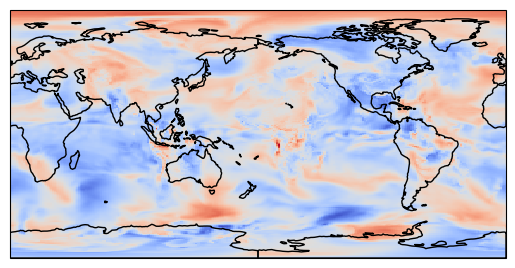

In [8]:
#plot the 2m temperature anomalies
ax = plt.subplot(1, 1, 1, projection=projection)
ax.pcolormesh(ds_ex_win.lon.values, ds_ex_win.lat.values, std_anom[0,:,:], cmap='coolwarm')
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='k', facecolor='none')

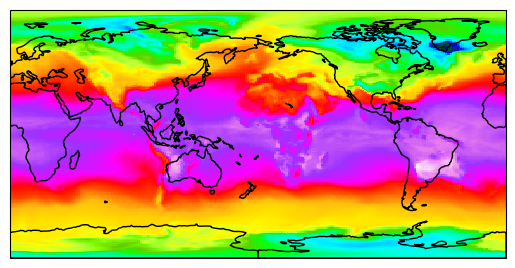

In [9]:
#plot the 2m temperatures
ax = plt.subplot(1, 1, 1, projection=projection)
ax.pcolormesh(ds_ex_win.lon.values, ds_ex_win.lat.values, ds_ex_win.TREFHT.values[0,:,:], cmap='gist_ncar')
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='k', facecolor='none')

### Column Water Vapor

In [10]:
#check all files are there. (8 filers per member, with 5 members should equal 40)
len(glob.glob("/Users/zkq5md/Desktop/UVA/Data/*.TMQ.*.nc"))

40

In [11]:
path = '/Users/zkq5md/Desktop/UVA/Data/Training/CWV'

#iterate through the members
for member in range(5):

    #load the current member
    ds = xr.open_mfdataset(f'/Users/zkq5md/Desktop/UVA/Data/*00{member+1}*.TMQ.*.nc')
    
    #subset data based on extended winter
    ds_ex_win = ds.sel(time=ds.time.dt.month.isin([1, 2, 3, 11, 12]))

    #for loop that calculates standard deviation and average for each member grid point.
    for day in np.unique(ds_ex_win.time.dt.dayofyear.values):
        #calculate average and standard deviation.
        avg = np.average(ds_ex_win.sel(time=ds_ex_win.time.dt.dayofyear.isin([day])).TMQ.values, axis=0)
        std = np.std(ds_ex_win.sel(time=ds_ex_win.time.dt.dayofyear.isin([day])).TMQ.values, axis=0)
    
        #calculate standardized anomaly for the day of year for the member.
        std_anom = (ds_ex_win.sel(time=ds_ex_win.time.dt.dayofyear.isin([day])).TMQ.values - avg)/std

        for num, did in enumerate(ds_ex_win.sel(time=ds_ex_win.time.dt.dayofyear.isin([day])).time.values):
            pickle.dump(std_anom[num,:,:],open(f'{path}/CWV_{did.year}_{str(did.month).zfill(2)}_'
                                               f'{str(did.day).zfill(2)}_mem{member+1}.pkl', 'wb'))

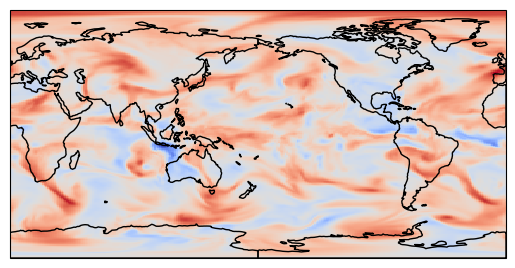

In [12]:
#plot the CWV anomalies
ax = plt.subplot(1, 1, 1, projection=projection)
ax.pcolormesh(ds_ex_win.lon.values, ds_ex_win.lat.values, std_anom[0,:,:], cmap='coolwarm')
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='k', facecolor='none')

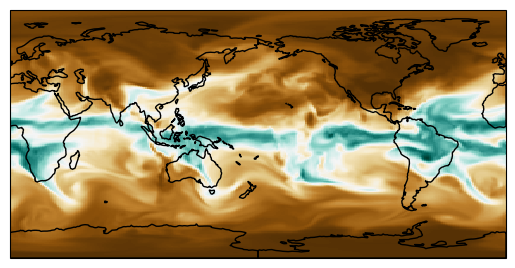

In [13]:
#plot the CWV
ax = plt.subplot(1, 1, 1, projection=projection)
ax.pcolormesh(ds_ex_win.lon.values, ds_ex_win.lat.values, ds_ex_win.TMQ.values[0,:,:], cmap='BrBG')
ax.add_feature(cartopy.feature.LAND, zorder=1, edgecolor='k', facecolor='none')